In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
path1 = './kmeans_data/Dataset1.csv'
path2 = './kmeans_data/Dataset2.csv'

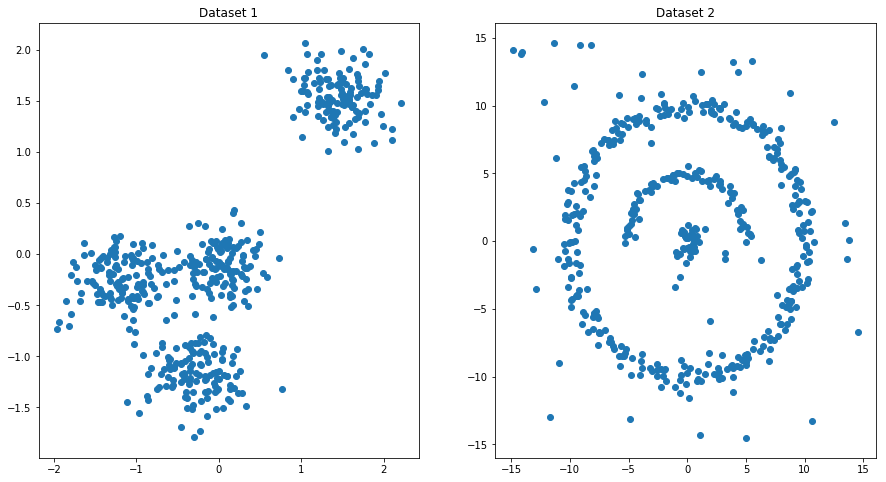

In [21]:
dataset1 = pd.read_csv(path1)
dataset2 = pd.read_csv(path2)
dataset1 = dataset1.values
dataset2 = dataset2.values

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 8)
axes[0].scatter(dataset1[:, 0], dataset1[:, 1])
axes[1].scatter(dataset2[:, 0], dataset2[:, 1])
axes[0].title.set_text('Dataset 1')
axes[1].title.set_text('Dataset 2')

In [38]:
def kmeans_clustering(data, k, iters):
    centroids_idx = np.random.randint(0, data.shape[0]-1, k)
    centroids = data[centroids_idx, :]
    for i in range(iters):
        distances = (data ** 2).sum(axis=1).reshape(-1, 1) + (centroids ** 2).sum(axis=1).reshape(1, -1) - 2 * (data @ centroids.T)
        clusters = distances.argmin(axis=1)
        for i in range(k):
            centroids[i] = data[clusters == i, :].mean(axis=0)
    return centroids, clusters

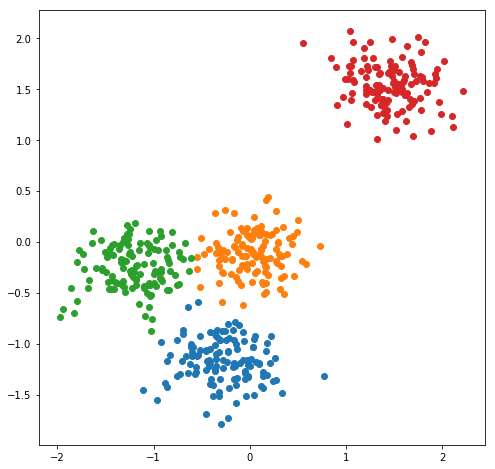

In [49]:
k = 4
centroids, clusters = kmeans_clustering(dataset1, k, 100)
fig = plt.figure()
fig.set_size_inches(8, 8)
for i in range(k):
    cluster = dataset1[clusters == i, :]
    plt.scatter(cluster[:, 0], cluster[:, 1])